In [9]:
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from stable_diffusion_model import load_vae_diffusion_model, load_model_from_checkpoint
from transformers import CLIPTokenizer, CLIPTextModel

# 超参数
device = "cuda" if torch.cuda.is_available() else ("mps" if torch.backends.mps.is_available() else "cpu")
image_size = 512
latent_size = 64  # 潜在表示的宽和高，用于生成图像
batch_size = 1
num_inference_steps = 50
guidance_scale = 7.5  # 控制图像生成的多样性


# 初始化模型
model = load_model_from_checkpoint('stable_diffusion_model_checkpoint_epoch_170.pth',
                                   in_channels=3,
                                   latent_dim=4,
                                   image_size=512,
                                   diffusion_timesteps=1000,
                                   device=device)
# model = load_vae_diffusion_model('stable_diffusion_model_final.pth',
#                                  in_channels=3,
#                                  latent_dim=4,
#                                  image_size=512,
#                                  diffusion_timesteps=1000,
#                                  device=device)
model.to(device)
model.eval()

# 加载 CLIP 模型
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-base-patch32").to(device)

def generate_image(prompt, num_images=1):
    # 使用 CLIP 模型编码文本
    text_input = tokenizer([prompt] * num_images, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")
    text_embeddings = text_encoder(text_input.input_ids.to(device)).last_hidden_state

    # 使用模型的sample方法生成图像
    with torch.no_grad():
        sampled_latents = model.sample(text_embeddings, latent_size=latent_size, batch_size=num_images, guidance_scale=guidance_scale, device=device)

    # 使用VAE解码器将潜在表示解码回像素空间
    with torch.no_grad():
        sampled_images = model.decode(sampled_latents)

    # 后处理生成的图像
    generated_images = []
    for img in sampled_images:
        img = img * 0.5 + 0.5  # Rescale to [0, 1]
        img = img.detach().cpu().permute(1, 2, 0).numpy()
        img = (img * 255).clip(0, 255).astype(np.uint8)
        generated_images.append(Image.fromarray(img))

    return generated_images

def display_images(images, prompts):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Create a single row with 4 columns
    axes = axes.flatten()

    for img, ax, prompt in zip(images, axes, prompts):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(prompt, fontsize=12, wrap=True)

    plt.tight_layout()
    plt.show()

Model loaded from checkpoint at epoch 269


Generating image for prompt: a water type pokemon with a big ear
Generating image for prompt: a yellow bird
Generating image for prompt: a green sheep pokemon
Generating image for prompt: 


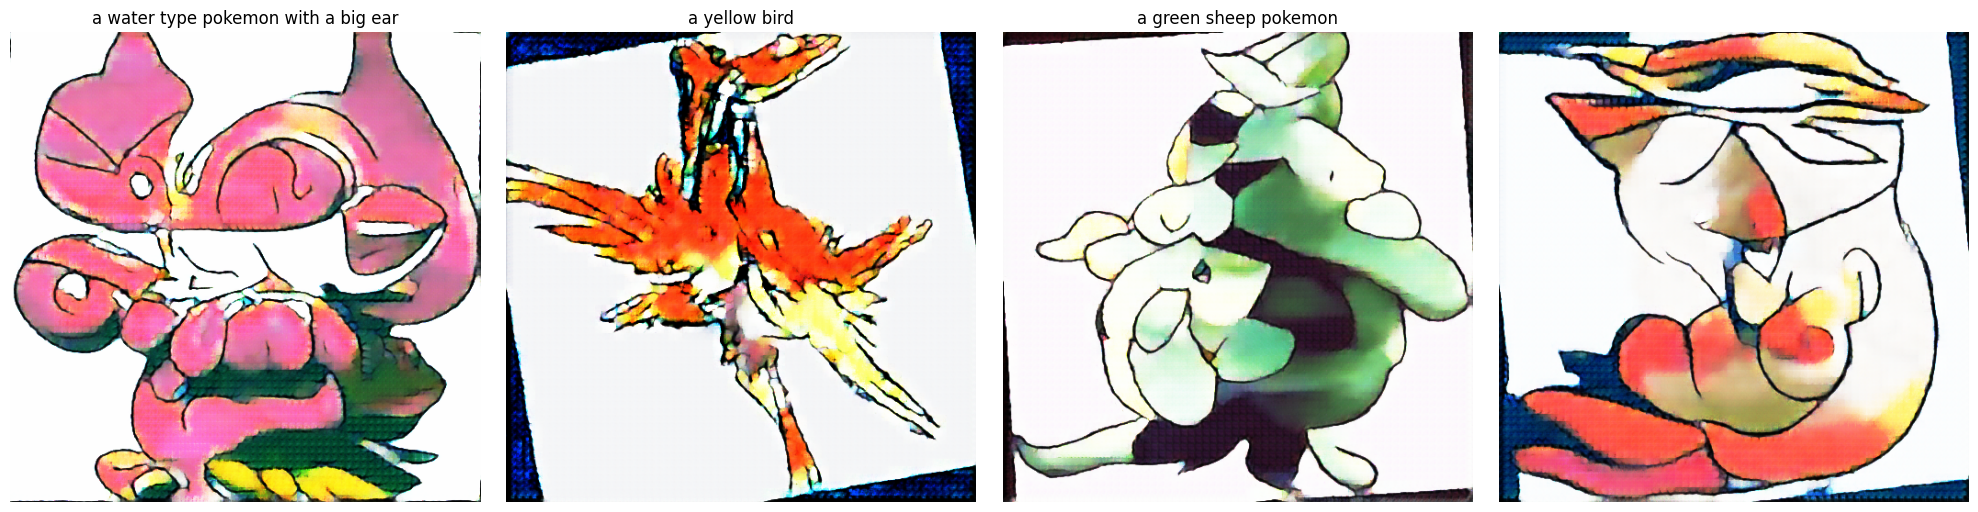

In [10]:
from IPython.display import display
# 生成图像的提示列表
prompts = [
    "a water type pokemon with a big ear",
    "a yellow bird", #  with a long beak flying through the air
    "a green sheep pokemon",
    "",
]

# 为每个提示生成图像
generated_images = []
for prompt in prompts:
    print(f"Generating image for prompt: {prompt}")
    images = generate_image(prompt, num_images=1)
    generated_images.extend(images)

# 显示生成的图像
display_images(generated_images, prompts)


Generating image for prompt: 一只大耳朵的小鸟
Generating image for prompt: a blue cartoon ball with a smile on it's face
Generating image for prompt: a yellow bird
Generating image for prompt: a fish with a horn on it's head


/var/folders/bf/c75nmms17cd1lgb7wtxd__yw0000gp/T/ipykernel_6605/342664639.py:70: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/bf/c75nmms17cd1lgb7wtxd__yw0000gp/T/ipykernel_6605/342664639.py:70: UserWarning: Glyph 21482 (\N{CJK UNIFIED IDEOGRAPH-53EA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/bf/c75nmms17cd1lgb7wtxd__yw0000gp/T/ipykernel_6605/342664639.py:70: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/bf/c75nmms17cd1lgb7wtxd__yw0000gp/T/ipykernel_6605/342664639.py:70: UserWarning: Glyph 32819 (\N{CJK UNIFIED IDEOGRAPH-8033}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/bf/c75nmms17cd1lgb7wtxd__yw0000gp/T/ipykernel_6605/342664639.py:70: UserWarning: Glyph 26421 (\N{CJK UNIFIED IDEOGRAPH-6735}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/bf/c75nmms17cd1lg

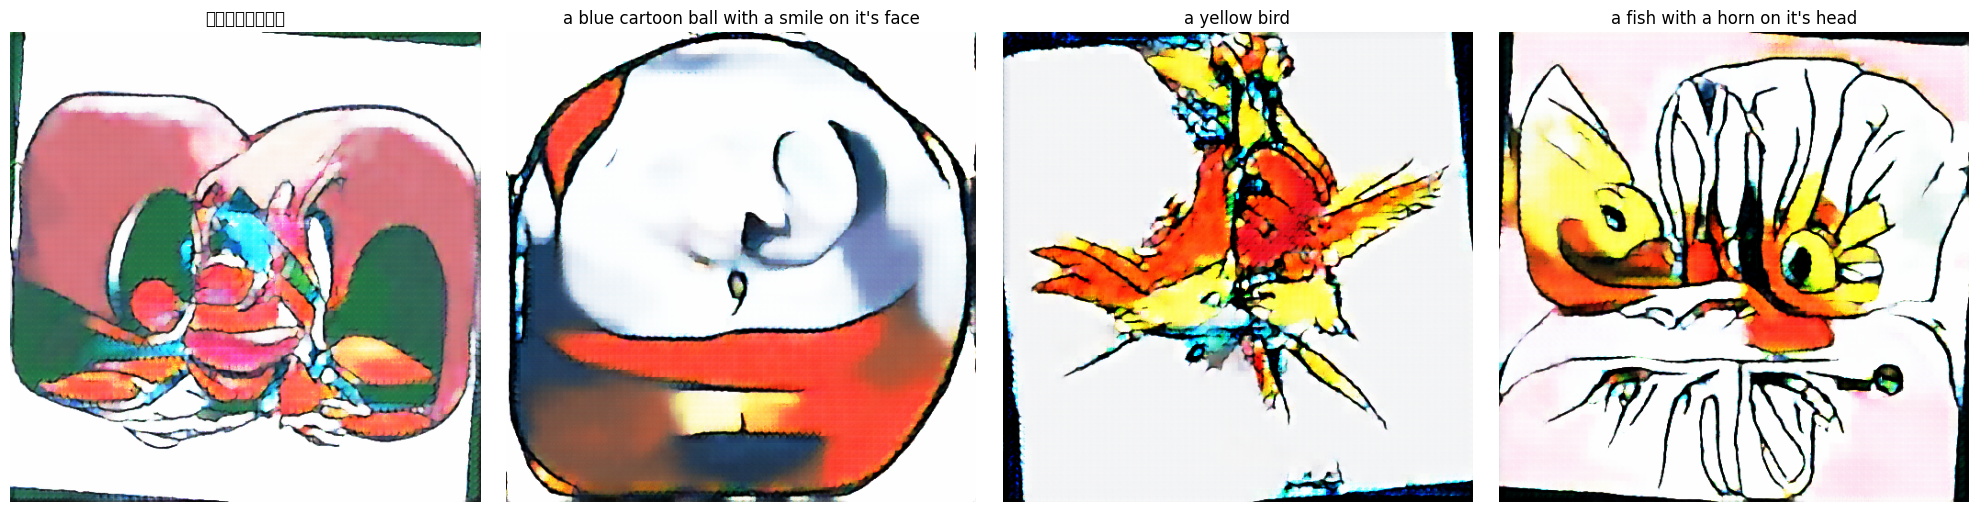

In [11]:
from IPython.display import display
# 生成图像的提示列表
prompts = [
    "一只大耳朵的小鸟",
    "a blue cartoon ball with a smile on it's face",
    "a yellow bird", #  with a long beak flying through the air
    "a fish with a horn on it's head",
]

# 为每个提示生成图像
generated_images = []
for prompt in prompts:
    print(f"Generating image for prompt: {prompt}")
    images = generate_image(prompt, num_images=1)
    generated_images.extend(images)

# 显示生成的图像
display_images(generated_images, prompts)
